# `Importing Libraries`


In [8]:
# Basic Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import  mean_squared_error


# Importing scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Importing XGBoost for gradient boosting
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")

# `Setting up the Project Working Directory`


In [9]:
%pwd

'c:\\Users\\milan\\OneDrive\\Documents\\WeatherCrimeHouston\\Notebooks'

In [10]:
os.chdir("../")

In [11]:
%pwd

'c:\\Users\\milan\\OneDrive\\Documents\\WeatherCrimeHouston'

# `Reading CSV`


In [12]:
# Basic Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv("./daily crime numbers and weather data for time series analysis.csv")
df.head()

,date,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2010-01-01,0,13,31,58,0,0,77,215,21,...,174.8,15.0,7.0,07:16:59,17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
1,2010-01-02,0,2,32,15,0,0,67,200,28,...,156.6,13.4,6.0,07:17:13,17:34:07,0.57,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
2,2010-01-03,0,0,38,35,0,0,52,179,35,...,80.2,6.7,3.0,07:17:25,17:34:50,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
3,2010-01-04,0,1,24,25,0,0,94,211,29,...,167.4,14.5,7.0,07:17:35,17:35:35,0.64,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
4,2010-01-05,0,3,19,22,0,0,88,183,20,...,174.1,15.0,7.0,07:17:44,17:36:20,0.67,Clear,Clear conditions throughout the day.,clear-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."


# `Convert 'date', 'sunrise' and 'sunset' columns`


In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   date                                       4960 non-null   object 
 1   Kidnapping/Abduction                       4960 non-null   int64  
 2   Sex Offenses, Forcible                     4960 non-null   int64  
 3   Robbery                                    4960 non-null   int64  
 4   Assault Offenses                           4960 non-null   int64  
 5   Arson                                      4960 non-null   int64  
 6   Extortion/Blackmail                        4960 non-null   int64  
 7   Burglary/Breaking & Entering               4960 non-null   int64  
 8   Larceny/Theft Offenses                     4960 non-null   int64  
 9   Motor Vehicle Theft                        4960 non-null   int64  
 10  Counterfeiting/Forgery  

In [42]:
df["date"] = pd.to_datetime(df["date"])

In [43]:
# df['day']=pd.to_datetime(df['date'],format="%d/%m/%Y").dt.day

In [44]:
# df['month']=pd.to_datetime(df['date'],format="%d/%m/%Y").dt.month

In [45]:
# df['year']=pd.to_datetime(df['date'],format="%d/%m/%Y").dt.year

In [46]:
# df['year'] = df['date'].str.split('-').str[0]
# df['month'] = df['date'].str.split('-').str[1]
# df['date'] = df['date'].str.split('-').str[2]

In [47]:
# df['year'] = df['year'].astype(int)
# df['month'] = df['month'].astype(int)
# df['date'] = df['date'].astype(int)

In [48]:
df["sunrise"].str.split(":")

0       [07, 16, 59]
1       [07, 17, 13]
2       [07, 17, 25]
3       [07, 17, 35]
4       [07, 17, 44]
            ...     
4955    [06, 37, 57]
4956    [06, 38, 33]
4957    [06, 39, 08]
4958    [06, 39, 43]
4959    [06, 40, 19]
Name: sunrise, Length: 4960, dtype: object

In [49]:
df["sunrise_hour"] = df["sunrise"].str.split(":").str[0]
df["sunrise_min"] = df["sunrise"].str.split(":").str[1]
df["sunrise_sec"] = df["sunrise"].str.split(":").str[2]

In [50]:
df["sunrise_hour"] = df["sunrise_hour"].astype(int)
df["sunrise_min"] = df["sunrise_min"].astype(int)
df["sunrise_sec"] = df["sunrise_sec"].astype(int)

In [51]:
df["sunset"].str.split(":")

0       [17, 33, 24]
1       [17, 34, 07]
2       [17, 34, 50]
3       [17, 35, 35]
4       [17, 36, 20]
            ...     
4955    [20, 17, 50]
4956    [20, 17, 12]
4957    [20, 16, 33]
4958    [20, 15, 53]
4959    [20, 15, 11]
Name: sunset, Length: 4960, dtype: object

In [52]:
df["sunset_hour"] = df["sunset"].str.split(":").str[0]
df["sunset_min"] = df["sunset"].str.split(":").str[1]
df["sunset_sec"] = df["sunset"].str.split(":").str[2]

In [53]:
df["sunset_hour"] = df["sunset_hour"].astype(int)
df["sunset_min"] = df["sunset_min"].astype(int)
df["sunset_sec"] = df["sunset_sec"].astype(int)

In [54]:
df["conditions"].value_counts()

conditions
Partially cloudy                1857
Rain, Partially cloudy          1411
Clear                           1038
Rain, Overcast                   357
Overcast                         179
Rain                              96
Snow, Rain, Partially cloudy      10
Snow, Rain, Overcast               9
Snow, Partially cloudy             2
Snow, Rain                         1
Name: count, dtype: int64

In [55]:
# Replace 'Partially cloudy' with 'cloudy' in the 'conditions' column
df.loc[df["conditions"] == "Partially cloudy", "conditions"] = "cloudy"
df.loc[df["conditions"] == "Rain, Partially cloudy", "conditions"] = "rain"
df.loc[df["conditions"] == "Clear", "conditions"] = "clear"
df.loc[df["conditions"] == "Rain, Overcast", "conditions"] = "rain"
df.loc[df["conditions"] == "Overcast", "conditions"] = "cloudy"
df.loc[df["conditions"] == "Rain", "conditions"] = "rain"
df.loc[df["conditions"] == "Snow, Rain, Partially cloudy", "conditions"] = "snow"
df.loc[df["conditions"] == "Snow, Rain, Overcast", "conditions"] = "snow"
df.loc[df["conditions"] == "Snow, Partially cloudy", "conditions"] = "snow"
df.loc[df["conditions"] == "Snow, Rain", "conditions"] = "cloudy"
df.loc[df["conditions"] == "Partially cloudy", "conditions"] = "snow"

In [56]:
df["conditions"].value_counts()

conditions
cloudy    2037
rain      1864
clear     1038
snow        21
Name: count, dtype: int64

# `list_of_cols_to_drop`


In [57]:
list_of_cols_to_drop = [
    "Kidnapping/Abduction",
    "Sex Offenses, Forcible",
    "Robbery",
    "Assault Offenses",
    "Arson",
    "Extortion/Blackmail",
    "Burglary/Breaking & Entering",
    "Larceny/Theft Offenses",
    "Motor Vehicle Theft",
    "Counterfeiting/Forgery",
    "Fraud Offenses",
    "Embezzlement",
    "Stolen Property Offenses",
    "Destruction/Damage/Vandalism of Property",
    "Drug/Narcotic Offenses",
    "Sex Offenses, Nonforcible",
    "Pornography/Obscene Material",
    "Gambling Offenses",
    "Prostitution Offenses",
    "Bribery",
    "Weapon Law Violations",
    "Human Trafficking or Kidnapping/Abduction",
    "Animal Cruelty",
    "Homicide Offenses",
    "Bad Checks",
    "Curfew/Loitering/Vagrancy Violations",
    "Disorderly Conduct",
    "Driving Under the Influence",
    "Drunkenness",
    "Family Offenses, Nonviolent",
    "Liquor Law Violations",
    "Peeping Tom",
    "Runaway",
    "Trespass of Real Property",
    "All Other Offenses",
    "mon_year",
    "sunrise",
    "sunset",
    "description",
    "icon",
    "stations",
    "month",
    "year",
]

# `Drop the specified columns from the DataFrame`


In [58]:
df.drop(columns=list_of_cols_to_drop, inplace=True)

In [59]:
list(df.columns)

['date',
 'Offense Count',
 'week',
 'season',
 'is_holiday',
 'is_weekend',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'moonphase',
 'conditions',
 'sunrise_hour',
 'sunrise_min',
 'sunrise_sec',
 'sunset_hour',
 'sunset_min',
 'sunset_sec']

# `Rearrange DataFrame Structure`


In [60]:
# Define the desired order of columns
desired_columns_order = [
    "date",
    "week",
    "sunrise_hour",
    "sunrise_min",
    "sunrise_sec",
    "sunset_hour",
    "sunset_min",
    "sunset_sec",
    "season",
    "is_holiday",
    "is_weekend",
    "snow",
    "snowdepth",
    "tempmax",
    "tempmin",
    "temp",
    "feelslikemax",
    "feelslikemin",
    "feelslike",
    "dew",
    "humidity",
    "precip",
    "precipprob",
    "precipcover",
    "preciptype",
    "windgust",
    "windspeed",
    "winddir",
    "sealevelpressure",
    "cloudcover",
    "visibility",
    "solarradiation",
    "solarenergy",
    "uvindex",
    "moonphase",
    "conditions",
    "Offense Count",
]
# Rearrange the columns according to the desired order
df = df[desired_columns_order]

# `Define numerical and categorical features`


In [61]:
num_features = [
    "date",
    "sunrise_hour",
    "sunrise_min",
    "sunrise_sec",
    "sunset_hour",
    "sunset_min",
    "sunset_sec",
    "tempmax",
    "tempmin",
    "temp",
    "feelslikemax",
    "feelslikemin",
    "feelslike",
    "dew",
    "humidity",
    "precip",
    "precipprob",
    "precipcover",
    "windgust",
    "windspeed",
    "winddir",
    "sealevelpressure",
    "cloudcover",
    "visibility",
    "solarradiation",
    "solarenergy",
    "uvindex",
    "moonphase",
]


cat_features = [
    "week",
    "season",
    "is_holiday",
    "is_weekend",
    "snow",
    "snowdepth",
    "preciptype",
    "conditions",
]

# `Corelation of the data`


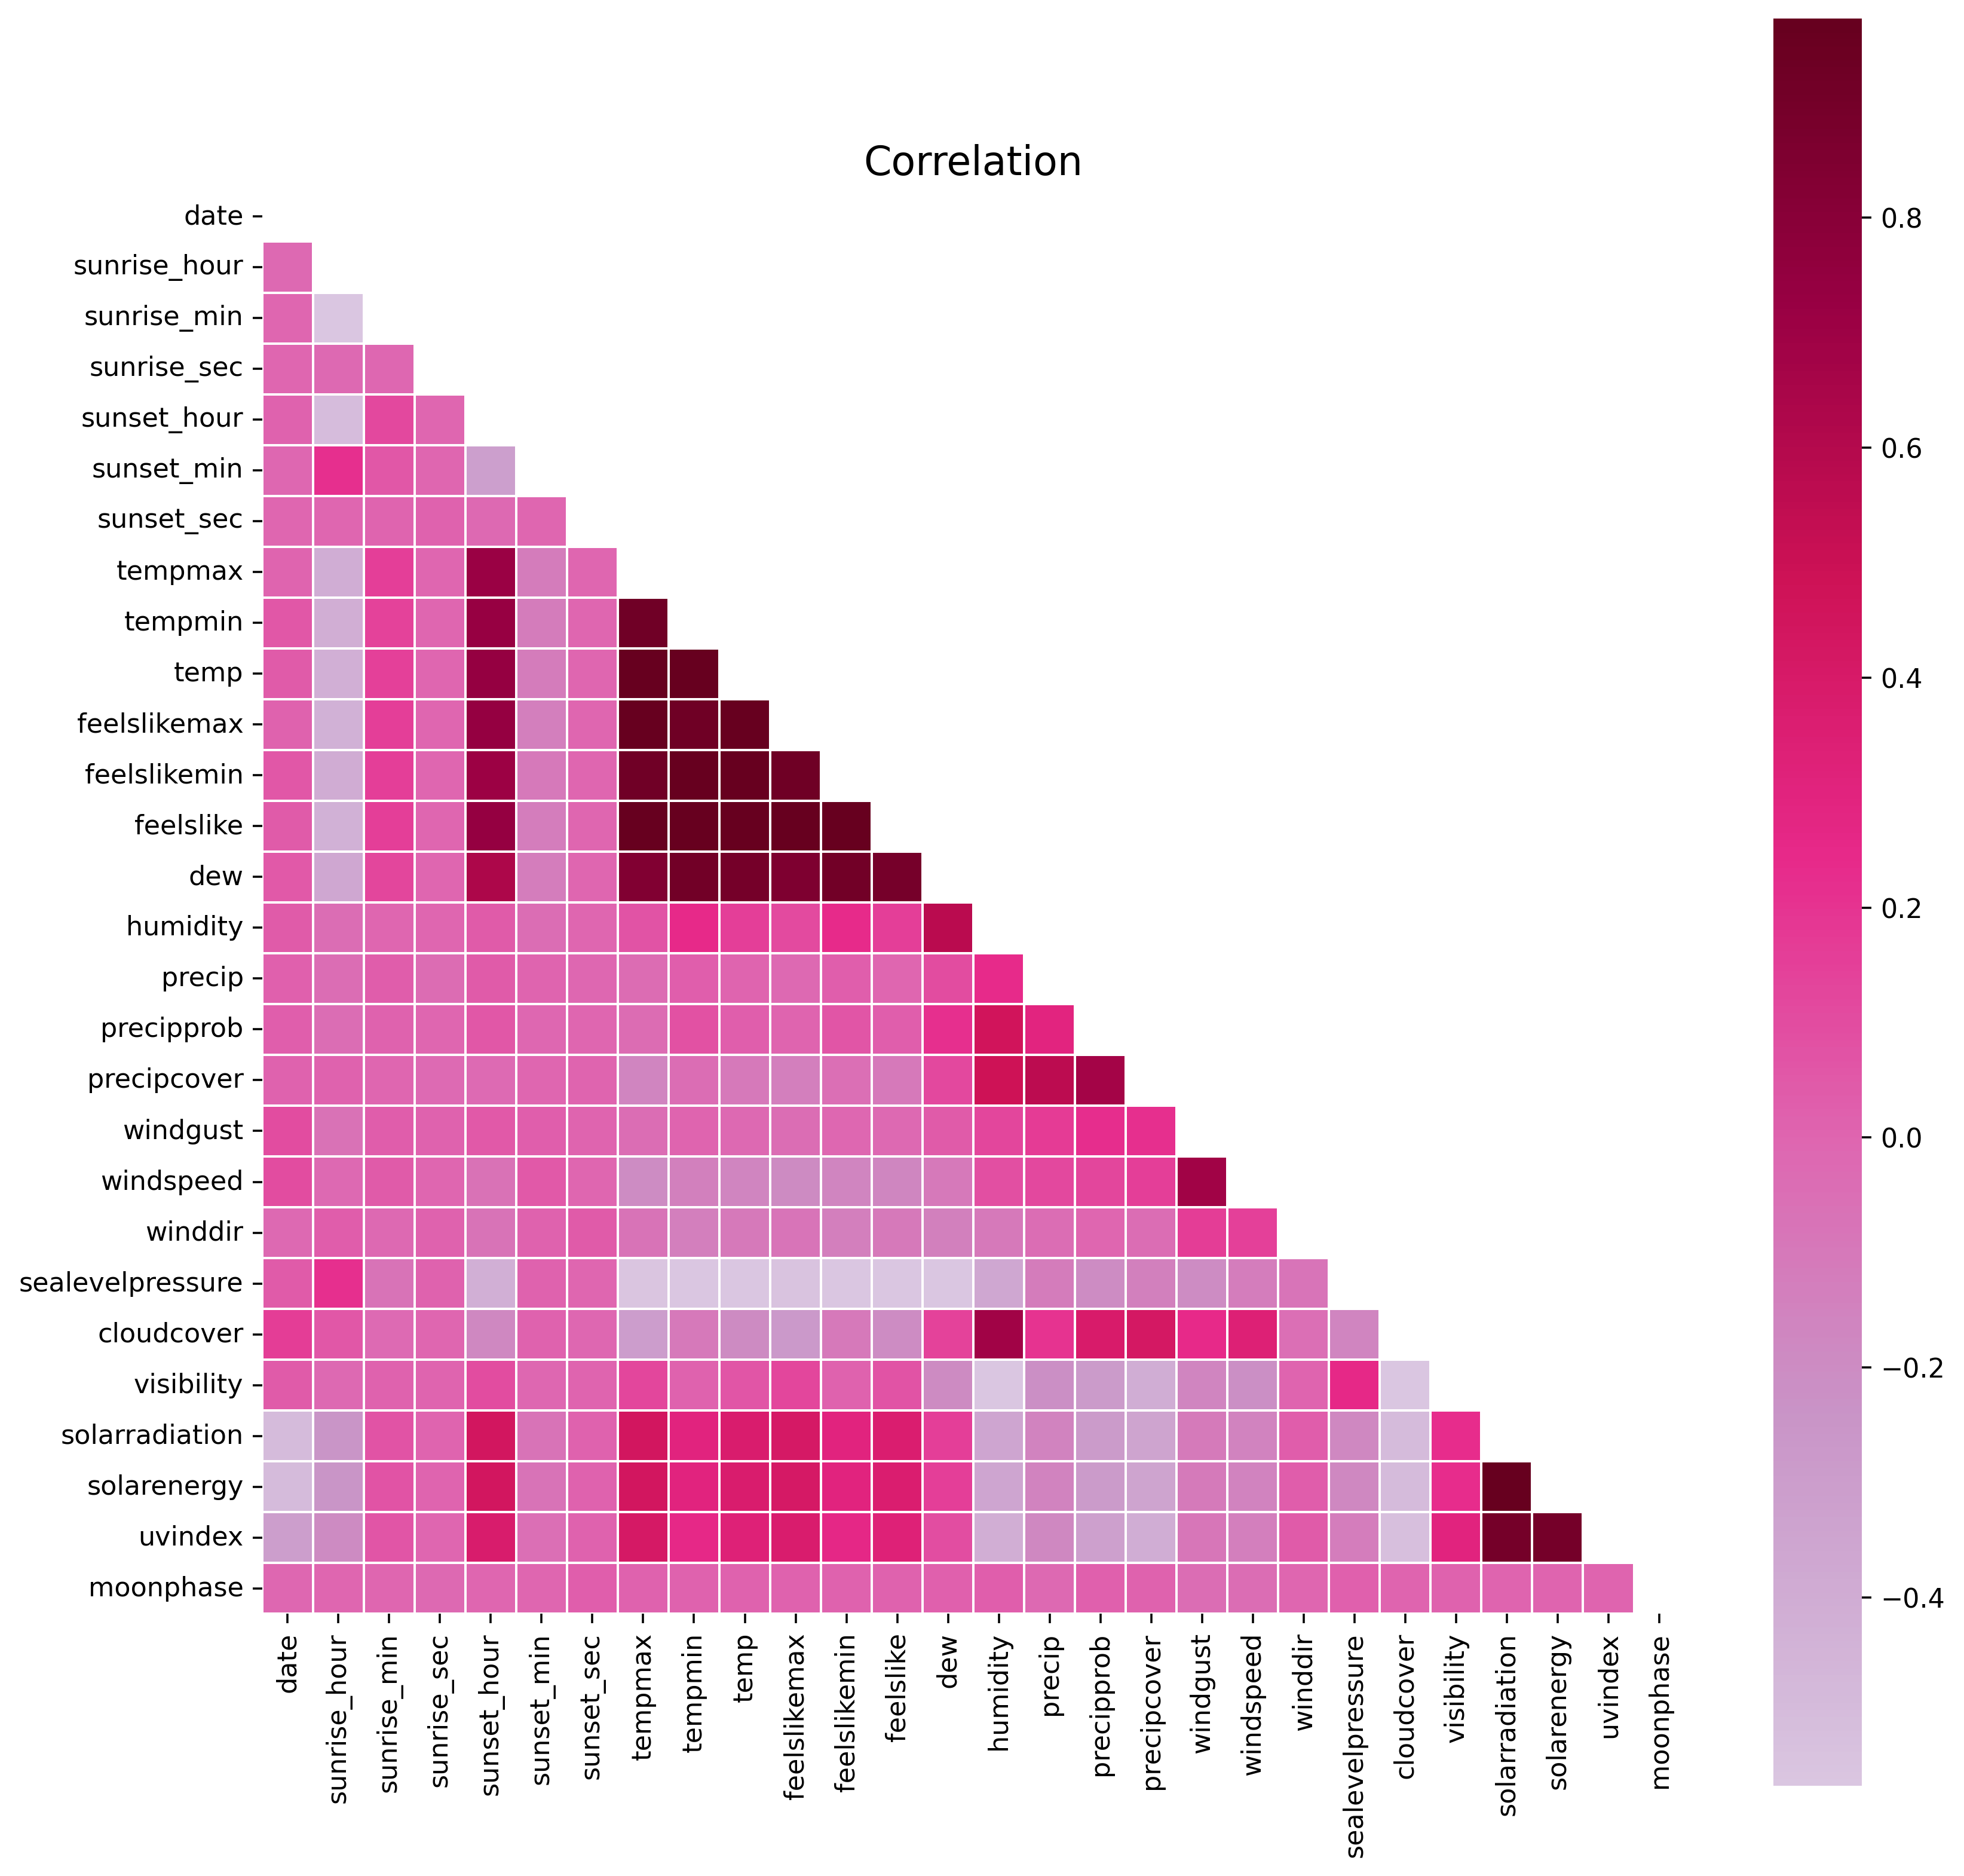

In [62]:
# Corelation of the data
plt.figure(figsize=(12, 12), dpi=320)
corr = df[num_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    annot=False,
    mask=mask,
    cmap="PuRd",
    robust=True,
    center=0,
    square=True,
    linewidths=0.5,
)
plt.title("Correlation", fontsize=15)
plt.show()

# `Feature Selection`


In [63]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (
                abs(corr_matrix.iloc[i, j]) > threshold
            ):  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [64]:
corr_features = correlation(df[num_features], 0.50)
len(set(corr_features))

16

In [65]:
corr_features

{'cloudcover',
 'dew',
 'feelslike',
 'feelslikemax',
 'feelslikemin',
 'humidity',
 'precipcover',
 'sealevelpressure',
 'solarenergy',
 'sunrise_min',
 'temp',
 'tempmax',
 'tempmin',
 'uvindex',
 'visibility',
 'windspeed'}

In [66]:
list_of_corr_cols_to_drop = [
    "cloudcover",
    "dew",
    "feelslike",
    "feelslikemax",
    "feelslikemin",
    "humidity",
    "precipcover",
    "sealevelpressure",
    "solarenergy",
    "tempmax",
    "tempmin",
    "uvindex",
    "visibility",
    "windspeed",
]

In [67]:
df.drop(columns=list_of_corr_cols_to_drop, inplace=True)

In [68]:
df.shape

(4960, 23)

# `Split the DataFrame into feature variables (X) and the target variable (y) using slicing`


In [69]:
X = df.iloc[:, :-1]  # Exclude the last column ('Offense Count') as the target variable
y = df.iloc[:, -1]  # The last column ('Offense Count') is the target variable

# Check the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4960, 22)
y shape: (4960,)


In [70]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4960 non-null   datetime64[ns]
 1   week            4960 non-null   object        
 2   sunrise_hour    4960 non-null   int32         
 3   sunrise_min     4960 non-null   int32         
 4   sunrise_sec     4960 non-null   int32         
 5   sunset_hour     4960 non-null   int32         
 6   sunset_min      4960 non-null   int32         
 7   sunset_sec      4960 non-null   int32         
 8   season          4960 non-null   object        
 9   is_holiday      4960 non-null   int64         
 10  is_weekend      4960 non-null   int64         
 11  snow            4960 non-null   float64       
 12  snowdepth       4960 non-null   float64       
 13  temp            4960 non-null   float64       
 14  precip          4960 non-null   float64       
 15  prec

In [71]:
csv_file_name = "crime_and_weather_data.csv"
save_directory = "./"

# Combine the directory and file name to create the full file path
file_path = save_directory + csv_file_name

# Export the DataFrame to a CSV file
df.to_csv(
    file_path, index=False
)  # Set index=False to exclude the index column from the CSV

# Optionally, print a message to confirm the file was saved
print(f"CSV file '{csv_file_name}' has been saved to '{save_directory}'")

CSV file 'crime_and_weather_data.csv' has been saved to './'


In [72]:
# Iterate through columns and reduce data types
for col in df.columns:
    if pd.api.types.is_integer_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast="integer")
    elif pd.api.types.is_float_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast="float")
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Save the reduced DataFrame to a CSV file
csv_file_name = "crime_and_weather_data.csv"
save_directory = "./"

# Combine the directory and file name to create the full file path
file_path = save_directory + csv_file_name

# Export the reduced DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Optionally, print a message to confirm the file was saved
print(
    f"CSV file '{csv_file_name}' with reduced data types has been saved to '{save_directory}'"
)

CSV file 'crime_and_weather_data.csv' with reduced data types has been saved to './'


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4960 non-null   datetime64[ns]
 1   week            4960 non-null   object        
 2   sunrise_hour    4960 non-null   int8          
 3   sunrise_min     4960 non-null   int8          
 4   sunrise_sec     4960 non-null   int8          
 5   sunset_hour     4960 non-null   int8          
 6   sunset_min      4960 non-null   int8          
 7   sunset_sec      4960 non-null   int8          
 8   season          4960 non-null   object        
 9   is_holiday      4960 non-null   int8          
 10  is_weekend      4960 non-null   int8          
 11  snow            4960 non-null   float32       
 12  snowdepth       4960 non-null   float32       
 13  temp            4960 non-null   float32       
 14  precip          4960 non-null   float32       
 15  prec

# `Split the data into training and testing sets`


In [74]:
# Split the data into training and testing sets with shuffle=False
from sklearn.model_selection import train_test_split, TimeSeriesSplit

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Define a time-based cross-validator
time_splitter = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3968, 22)
X_test shape: (992, 22)
y_train shape: (3968,)
y_test shape: (992,)


# `Automation`


In [75]:
num_cols = [
    "sunrise_hour",
    "sunrise_min",
    "sunrise_sec",
    "sunset_hour",
    "sunset_min",
    "sunset_sec",
    "temp",
    "precip",
    "precipprob",
    "windgust",
    "winddir",
    "solarradiation",
    "moonphase",
]


cat_cols = [
    "week",
    "season",
    "is_holiday",
    "is_weekend",
    "snow",
    "snowdepth",
    "preciptype",
    "conditions",
]

In [76]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [77]:
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


# Custom transformer for the 'date' column
class DateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Add your custom transformation for the 'date' column here
        # For example, you can convert it to the number of days since a reference date
        reference_date = X["date"].min()
        X_transformed = (X["date"] - reference_date).dt.days
        return X_transformed.values.reshape(-1, 1)


# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
        (
            "date",
            DateTransformer(),
            ["date"],
        ),  # Apply custom transformation to 'date' column
    ],
    n_jobs=-1,
    verbose=True,
)

In [78]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# `Model Training`


In [79]:
# Model Training
import lightgbm as lgb
import xgboost as xgb

models = {
    "LightGBM": lgb.LGBMRegressor(),  # Initialize LGBMRegressor directly
    "XGBoost": xgb.XGBRegressor(),
}

In [80]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit  # Import TimeSeriesSplit


def evaluate_model(X_train, y_train, X_test, y_test, models):
    report = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict the Training Data
        y_train_pred = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)

        # Predict the Testing Data
        y_test_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)

        # Calculate the difference between train and test R2 scores
        r2_difference = train_r2 - test_r2

        # Determine if the model is overfitting (threshold can be adjusted)
        overfit = r2_difference > 0.1  # Adjust the threshold as needed

        report.append(
            {
                "Model": model_name,
                "Train_RMSE": train_rmse,
                "Train_R2": train_r2,
                "Test_RMSE": test_rmse,
                "Test_R2": test_r2,
                "R2_Difference": r2_difference,
                "Overfit": overfit,
            }
        )

    # Create a Pandas DataFrame and sort by test RMSE
    df = pd.DataFrame(report)
    df = df.sort_values(by="Test_RMSE")

    return df

In [81]:
# Call evaluate_model function with your data and models
results = evaluate_model(X_train, y_train, X_test, y_test, models)

# Print the results DataFrame
results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 3968, number of used features: 34
[LightGBM] [Info] Start training from score 416.492188


,Model,Train_RMSE,Train_R2,Test_RMSE,Test_R2,R2_Difference,Overfit
0,LightGBM,23.570557,0.974712,353.706457,-29.269058,30.24377,True
1,XGBoost,8.862233,0.996425,353.875366,-29.297975,30.29440,True


# `Hyperparameter Tuning for LGBMRegressor`


In [282]:
import lightgbm as lgb
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameters to search over
params = {
    "boosting_type": ["gbdt", "dart", "rf"],
    "num_leaves": [31, 50, 100, 200],
    "max_depth": [-1, 10, 20, 30],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "objective": ["regression", "huber", "poisson"],
    "min_child_samples": [10, 20, 30],
    "reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "reg_lambda": [0.0, 0.1, 0.5, 1.0],
    "random_state": [42],  # Set a specific random_state for reproducibility
    "force_row_wise": [
        True
    ],  # Set to True to use row-wise partition for faster training
}

model = lgb.LGBMRegressor()

# Create a RandomizedSearchCV object to find the best parameters
random_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=100,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=3,
    n_jobs=-1,
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Get the best model with the tuned hyperparameters
best_model = random_search.best_estimator_

# Make predictions on the training and testing data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE and R2 scores for both training and testing datasets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the difference between train and test R2 scores
r2_difference = train_r2 - test_r2

# Determine if the model is overfitting (threshold can be adjusted)
overfit = r2_difference > 0.1

# Print the results
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")
print(f"Is the model overfit? {'Yes' if overfit else 'No'}")

# Save the trained model to a file
model_file_path = "LGBMRegressor_model.pkl"
with open(model_file_path, "wb") as model_file:
    pickle.dump(best_model, model_file)

# Print the path where the model is saved
print(f"Model saved to {model_file_path}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 3968, number of used features: 34
[LightGBM] [Info] Start training from score 6.031868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

# `Hyperparameter Tuning for XGBRegressor`


In [281]:
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

# Define a dictionary of hyperparameters to search over
params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.1, 0.01, 0.001],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0, 0.1, 0.5],
    "objective": ["reg:squarederror"],
    "random_state": [None, 42, 100],
}

model = xgb.XGBRegressor()


def rmse_scorer(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return (
        -rmse
    )  # We use negative RMSE because GridSearchCV tries to maximize the score


# Create the custom scorer
custom_scorer = make_scorer(rmse_scorer)

# Create a RandomizedSearchCV object to find the best parameters
random_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=100,
    n_jobs=-1,
    scoring=custom_scorer,
    cv=5,
    verbose=3,
)


# Fit the GridSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Get the best model with the tuned hyperparameters
best_model = random_search.best_estimator_

# Make predictions on the training and testing data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE and R2 scores for both training and testing datasets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the difference between train and test R2 scores
r2_difference = train_r2 - test_r2

# Determine if the model is overfitting (threshold can be adjusted)
overfit = r2_difference > 0.1

# Print the results
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")
print(f"Is the model overfit? {'Yes' if overfit else 'No'}")


# Save the trained model to a file in the 'artifacts/' directory
model_file_path = "artifacts/XGBRegressor_model.pkl"
with open(model_file_path, "wb") as model_file:
    pickle.dump(best_model, model_file)

# Print the path where the model is saved
print(f"Model saved to {model_file_path}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
{'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'random_state': 100, 'objective': 'reg:squarederror', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Train RMSE: 29.8409
Test RMSE: 351.3726
Train R2 Score: 0.9595
Test R2 Score: -28.8709
Is the model overfit? Yes
Model saved to artifacts/XGBRegressor_model.pkl


# `Let's choose best from these two choices and change the Random forest to LGBMRegressor `


In [82]:
import lightgbm as lbg
import xgboost as xgb

models = {
    "LightGBM": lbg.LGBMRegressor(
        reg_lambda=1.0,
        reg_alpha=0.1,
        random_state=42,
        objective="poisson",
        num_leaves=100,
        n_estimators=200,
        min_child_samples=20,
        max_depth=10,
        learning_rate=0.1,
        force_row_wise=True,
        boosting_type="gbdt",
    ),
    "XGBoost": xgb.XGBRegressor(
        subsample=0.9,
        reg_lambda=0.1,
        reg_alpha=0.1,
        random_state=100,
        objective="reg:squarederror",
        n_estimators=200,
        max_depth=3,
        learning_rate=0.1,
        gamma=0.2,
        colsample_bytree=0.8,
    ),
}

In [83]:
best_tuned_model = evaluate_model(X_train, y_train, X_test, y_test, models)

# Print the sorted results DataFrame
best_tuned_model

[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 3968, number of used features: 34
[LightGBM] [Info] Start training from score 6.031868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,Train_RMSE,Train_R2,Test_RMSE,Test_R2,R2_Difference,Overfit
1,XGBoost,29.840922,0.959468,351.372620,-28.870932,29.830400,True
0,LightGBM,18.068768,0.985140,353.434581,-29.222544,30.207683,True


In [286]:
import os

# Create a directory for artifacts if it doesn't exist
artifacts_dir = "artifacts"
if not os.path.exists(artifacts_dir):
    os.makedirs(artifacts_dir)

# Export the DataFrame to a CSV file
df.to_csv(os.path.join(artifacts_dir, "crime_weather_forecast.csv"), index=False)

# Export X_train and y_train to CSV files
train_data = pd.concat(
    [pd.DataFrame(X_train), pd.DataFrame({"target": y_train})], axis=1
)
train_data.to_csv(os.path.join(artifacts_dir, "X_train.csv"), index=False)

# Export X_test and y_test to CSV files
test_data = pd.concat([pd.DataFrame(X_test), pd.DataFrame({"target": y_test})], axis=1)
test_data.to_csv(os.path.join(artifacts_dir, "X_test.csv"), index=False)

# `We got XGboost is our best model`
